# Análisis de filtros

En este cuaderno veremos cómo :

* Dados los coeficientes de un filtro

  * Determinar el tipo de filtro que es: paso-bajo, paso-banda, ...
  
  * Determinar el límite de la banda de paso, es decir el margen de frecuencias donde la atenuación es inferior a una tolerancia en dB.
  
  * Determinar el límite de la banda atenuada, es decir el margen de frecuencias donde la atenuación es mayor que un cierto valor mínimo.




In [2]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math
import cmath

import warnings
warnings.filterwarnings('ignore')


# Procedimiento de diseño
El proceso de diseño comienza con unas especificaciones analógicas. Un ejemplo sería:
* Filtro paso-bajo de frecuencia de corte 3 Khz.
* Atenuación máxima en la bada de paso: 2 dB
* Atenuación mínima en la banda atenuada: 50 dB.
* Anchura banda de transición: 500. Esto quiere decir que:
  * En el rango 0-2.75 khz tendríamos 2 dB
  * En el rango 3.25- khz tendríamos al menos 50 dBs de atenuación en todas las frecuencias.
  
A continuación se trasladan las especificaciones de frecuencia a frecuencia discreta sabiendo a qué frecuencia trabajará el filtro $f_s$  

## Diseño del filtro a analizar

Será un filtro paso-banda

In [6]:
fs=18000
f_paso =np.array([3000, 6000])/fs # digital
f_atenuada= np.array([2500, 6500]) /fs # digital
print('fpaso=',f_paso)
print('faten=',f_atenuada)

tolpaso = 2 # dB
tolatenuada = 55

fpaso= [0.16666667 0.33333333]
faten= [0.13888889 0.36111111]


El siguiente paso consiste en:
* Elegir un tipo de aproximación. En este caso elegiremos Chebyshev1
  * Se explica en clase brevemente en qué consiste esta aproximación
  * Se explica en clase otro tipo de aproximaciones que existen.
* Determinar los parámetros de la aproximación
  * Orden del filtro: número de coeficientes que necesitaremos
  * Rizado en la banda de paso. En nuestro caso 2 dB
  * Frecuencia de corte: según el tipo de aproximación es una cosa u otra. Normalmente está entre f_paso y f_atenuada.


In [8]:
# Existen funciones similares para otro tipo de filtros
orden,Wn=signal.cheb1ord(f_paso*2,f_atenuada*2,tolpaso,tolatenuada)# Ojo al *2 de las frecuencias. Las atenuaciones en dBs
print(orden)

8


Con esos datos procedemos al diseño propiamente dicho:

In [10]:
B,A=signal.cheby1(orden,2,Wn,'bandpass')#Tambien se vale highpass. Si no se pone se entiende lowpass

In [18]:
np.savez('TareaAnalisis.npz',B=B,A=A)

In [22]:
coeficientes=np.load('TareaAnalisis.npz')
AA=coeficientes['A']
BB=coeficientes['B']

print(A,AA)

[ 1.00000000e+00 -5.93969318e-15  5.25653499e+00 -2.79776202e-14
  1.35752852e+01 -7.14983628e-14  2.20152574e+01 -1.10134124e-13
  2.43002923e+01 -1.04805054e-13  1.86182107e+01 -4.44089210e-14
  9.66552829e+00 -1.59872116e-14  3.11856669e+00 -3.27515792e-15
  4.83028581e-01] [ 1.00000000e+00 -5.93969318e-15  5.25653499e+00 -2.79776202e-14
  1.35752852e+01 -7.14983628e-14  2.20152574e+01 -1.10134124e-13
  2.43002923e+01 -1.04805054e-13  1.86182107e+01 -4.44089210e-14
  9.66552829e+00 -1.59872116e-14  3.11856669e+00 -3.27515792e-15
  4.83028581e-01]


Calcularemos y representaremos la respuesta en frecuencia para comprobar que todo OK

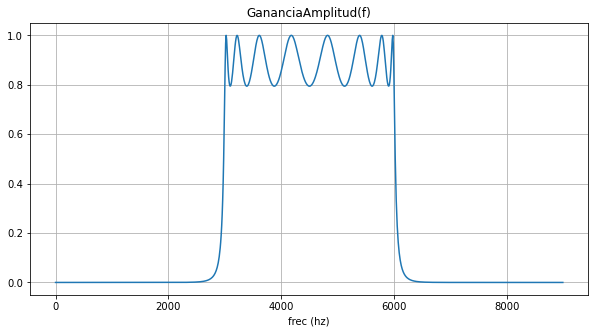

In [11]:
w,H=signal.freqz(B,A,1024)
_=plt.plot(w/2/math.pi*fs,np.absolute(H))
_=plt.grid()
_=plt.title('GananciaAmplitud(f)')
_=plt.xlabel('frec (hz)')

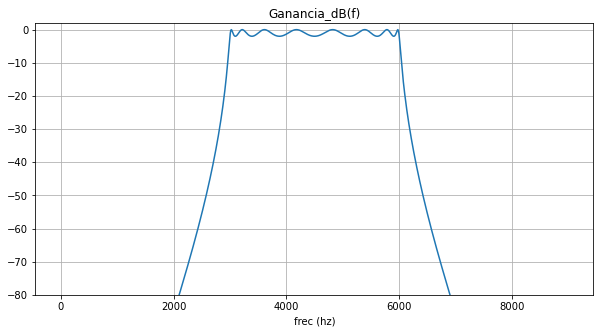

In [12]:
#Lo mismo en dBs
w,H=signal.freqz(B,A,1024)
_=plt.plot(w/2/math.pi*fs,20*np.log10(np.absolute(H)))
_=plt.grid()
_=plt.title('Ganancia_dB(f)')
_=plt.xlabel('frec (hz)')
_=plt.ylim(-80,2)

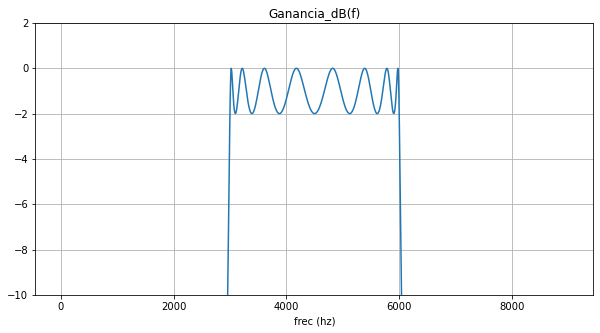

In [13]:
# Detalle banda de paso
#Lo mismo en dBs
w,H=signal.freqz(B,A,1024)
_=plt.plot(w/2/math.pi*fs,20*np.log10(np.absolute(H)))
_=plt.grid()
_=plt.title('Ganancia_dB(f)')
_=plt.xlabel('frec (hz)')
_=plt.ylim(-10,2)